In [1]:
%matplotlib inline

import geopandas as gpd
import pandas as pd

from shapely.geometry import MultiPolygon

C:\Users\engce\AppData\Roaming\Python\Python39\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\engce\AppData\Local\Temp\ipykernel_14500\2921320996.py:3: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth.

In [2]:
source_url = ("https://www.naturalearthdata.com/"\
              "http//www.naturalearthdata.com/download/"\
              "10m/cultural/ne_10m_admin_0_countries.zip"
             )
source_url 

'https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip'

In [3]:

# Caminho para o arquivo Shapefile (.shp)
shapefile_path = 'ne_10m_admin_0_countries.shp'

# Abrir o arquivo Shapefile usando o Geopandas
gdf = gpd.read_file(shapefile_path)




<AxesSubplot:>

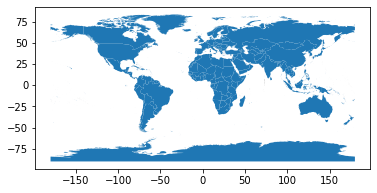

In [4]:
gdf.plot()

TESTANDO COM BAIRRO OFICIAL

In [5]:
areas = gdf.to_crs(epsg=3857).area

<AxesSubplot:ylabel='Frequency'>

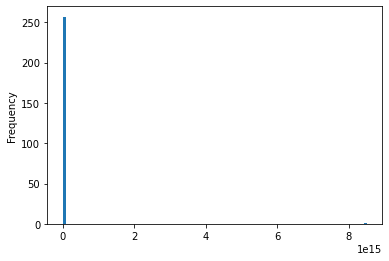

In [6]:
areas.plot.hist(bins=100)

In [7]:
smallest = areas.max() / 4000

<AxesSubplot:>

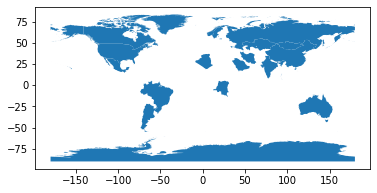

In [8]:
small = areas.loc[areas < smallest].index
large = gdf.loc[areas.index.difference(small)]
large.plot()


In [9]:
gdf.geometry.head()

0    MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...
1    MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...
2    MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...
3    POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...
4    MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...
Name: geometry, dtype: geometry

In [10]:
type(gdf.geometry)

geopandas.geoseries.GeoSeries

In [11]:
type(gdf.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

In [12]:
gdf["centroid"] = gdf.geometry.centroid

C:\Users\engce\AppData\Local\Temp\ipykernel_14500\813303301.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["centroid"] = gdf.geometry.centroid


## Agora, ele encontrou um ponto no "centro" da região delimitada:

In [13]:
gdf.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,centroid
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",POINT (117.27043 -2.22296)
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",POINT (109.69887 3.79239)
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",POINT (-71.36437 -37.74361)
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",POINT (-64.68475 -16.70688)
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,1,Peru,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",POINT (-74.37806 -9.15439)


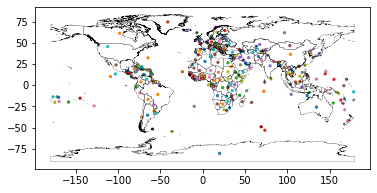

In [14]:
# Plot centroids
ax = gdf.set_geometry("centroid").plot("ADMIN", markersize=5)
# Plot polygons without color filling
gdf.plot(
    "ADMIN", ax=ax, facecolor="none", edgecolor="k", linewidth=0.2
);

## Agora, é possível encontrar uma linha inteira associada a um nome da linha:

O nome normalmente é único.

In [15]:
gdf.query('ADMIN == "Bolivia"')

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,centroid
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",POINT (-64.68475 -16.70688)


In [16]:
gdf.query('ADMIN == "Brazil"')

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,centroid
44,Admin-0 country,0,2,Brazil,BRA,0,2,Sovereign country,1,Brazil,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-57.60279 -30.19052, -57.61170...",POINT (-53.09248 -10.78086)


## Agora, é possível focar na geometria associada a linha específica:

Associando o "nome" usando a função "query".

### Exemplo:

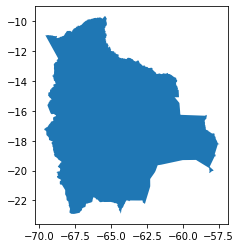

In [17]:
gdf.query('ADMIN == "Bolivia"').plot();

### Exemplo:

In [18]:
gdf.query('ADMIN == "Indonesia"')

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,centroid
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",POINT (117.27043 -2.22296)


<AxesSubplot:>

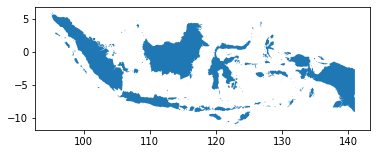

In [19]:
gdf.query('ADMIN == "Indonesia"').plot()

# Agora meu teste:

## Usando uma base de dados de BH. 

Escolhendo uma base de dados de BH, de Minas Gerais, para praticar os exemplos dados.

In [20]:
bairrooficial = pd.read_csv("BAIRRO_OFICIAL.csv")
bairrooficial.head()

,FID,ID_BAC,CODIGO,TIPO,NOME,AREA_KM2,PERIMETR_M,GEOMETRIA
0,BAIRRO_OFICIAL.210,210,170,Bairro,Estoril,2.901,9398.088,MULTIPOLYGON (((607748.90591021 7793194.959344...
1,BAIRRO_OFICIAL.326,326,529,Bairro,Madre Gertrudes,0.606,4434.859,MULTIPOLYGON (((603996.597648011 7793168.57509...
2,BAIRRO_OFICIAL.167,167,470,Vila,São Domingos,0.157,3053.441,MULTIPOLYGON (((607340.346970097 7794045.57080...
3,BAIRRO_OFICIAL.260,260,123,Bairro,São Bento,0.816,5675.773,MULTIPOLYGON (((608979.13967661 7793127.822415...
4,BAIRRO_OFICIAL.229,229,207,Bairro,dos Milionários,1.012,5718.773,MULTIPOLYGON (((603996.217957546 7790385.35674...


<AxesSubplot:>

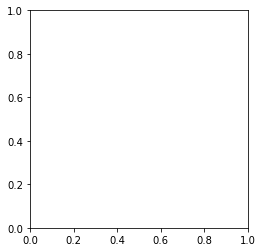

In [21]:
bairrogdf = gpd.read_file("BAIRRO_OFICIAL.csv")
bairrogdf.plot()

### Como pode ser visto, não funcionou, por quê?

Possivelmente pela falta de entendimento do geopandas em reconhecer a coluna geometry. Isso pode ser resolvido:

<AxesSubplot:>

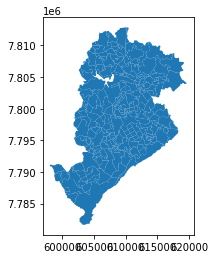

In [22]:
from shapely.wkt import loads

bairrooficial['geometry'] = bairrooficial['GEOMETRIA'].apply(loads)


nova = gpd.GeoDataFrame(bairrooficial, geometry='geometry')
nova.plot()

### Funcionou, com pouca adaptação.

Funcionou. Unica adaptação que foi necessária, foi o entendimento da coluna geometry, antes o geopandas não reconhecia.

In [23]:
pip install shapely


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [24]:
nova.query('NOME == "São Bento"')

,FID,ID_BAC,CODIGO,TIPO,NOME,AREA_KM2,PERIMETR_M,GEOMETRIA,geometry
3,BAIRRO_OFICIAL.260,260,123,Bairro,São Bento,0.816,5675.773,MULTIPOLYGON (((608979.13967661 7793127.822415...,"MULTIPOLYGON (((608979.140 7793127.822, 609035..."


<AxesSubplot:>

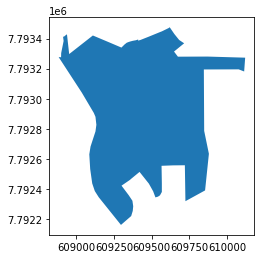

In [25]:
nova.query('NOME == "São Bento"').plot()

###  O Mapa ainda não estã dando muito certo. 


In [26]:
url = ("https://jeodpp.jrc.ec.europa.eu/ftp/"\
       "jrc-opendata/GHSL/"\
       "GHS_FUA_UCDB2015_GLOBE_R2019A/V1-0/"\
       "GHS_FUA_UCDB2015_GLOBE_R2019A_54009_1K_V1_0.zip"
      )
url

'https://jeodpp.jrc.ec.europa.eu/ftp/jrc-opendata/GHSL/GHS_FUA_UCDB2015_GLOBE_R2019A/V1-0/GHS_FUA_UCDB2015_GLOBE_R2019A_54009_1K_V1_0.zip'

In [27]:
p = f"zip+{url}!GHS_FUA_UCDB2015_GLOBE_R2019A_54009_1K_V1_0.gpkg"
fuas = gpd.read_file(p)
sao_paulo = fuas.query("eFUA_name == 'São Paulo'").to_crs("EPSG:4326")

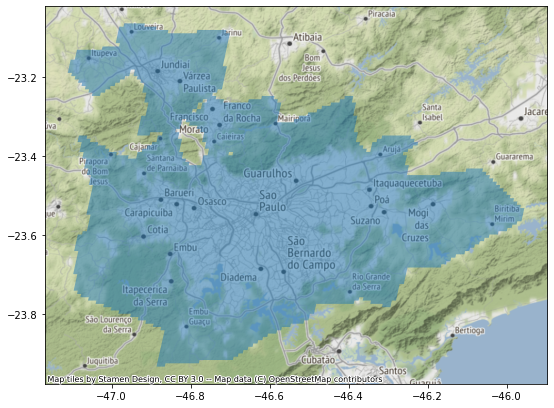

In [31]:

import contextily
#Chamando o arquivo em zip, associando ao link.
p = f"zip+{url}!GHS_FUA_UCDB2015_GLOBE_R2019A_54009_1K_V1_0.gpkg"

#A partir do arquivo em zip, é feita a leitura dele para o geopandas. 
fuas = gpd.read_file(p)

#Agora é reconhecer a regição de são paulo. 
sao_paulo = fuas.query("eFUA_name == 'São Paulo'").to_crs("EPSG:4326")


ax = sao_paulo.plot(alpha=0.5, figsize=(9, 9))
contextily.add_basemap(ax, crs=sao_paulo.crs)




In [32]:
url = ("https://cidportal.jrc.ec.europa.eu/ftp/"\
       "jrc-opendata/GHSL/GHS_POP_MT_GLOBE_R2019A/"\
       "GHS_POP_E2015_GLOBE_R2019A_54009_250/V1-0/"\
       "tiles/"\
       "GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0_13_11.zip"
      )
url

'https://cidportal.jrc.ec.europa.eu/ftp/jrc-opendata/GHSL/GHS_POP_MT_GLOBE_R2019A/GHS_POP_E2015_GLOBE_R2019A_54009_250/V1-0/tiles/GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0_13_11.zip'

In [33]:
'https://cidportal.jrc.ec.europa.eu/ftp/jrc-opendata/GHSL/GHS_POP_MT_GLOBE_R2019A/GHS_POP_E2015_GLOBE_R2019A_54009_250/V1-0/tiles/GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0_13_11.zip'

'https://cidportal.jrc.ec.europa.eu/ftp/jrc-opendata/GHSL/GHS_POP_MT_GLOBE_R2019A/GHS_POP_E2015_GLOBE_R2019A_54009_250/V1-0/tiles/GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0_13_11.zip'

In [34]:
import rioxarray

In [35]:
%%time
p = f"zip+{url}!GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0_13_11.tif"
ghsl = rioxarray.open_rasterio(p)
ghsl

CPU times: total: 172 ms
Wall time: 6.45 s


<xarray.DataArray (band: 1, y: 4000, x: 4000)>
[16000000 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 -5.041e+06 -5.041e+06 ... -4.041e+06 -4.041e+06
  * y            (y) float64 -2e+06 -2e+06 -2.001e+06 ... -3e+06 -3e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -200.0
    scale_factor:   1.0
    add_offset:     0.0

In [36]:
type(ghsl)

xarray.core.dataarray.DataArray

### RioXarray.

**RioXarray** serve para abrir um arquivo do tipo TIFF. Onde com "Time" é mostrado o tempo de abertura do arquivo e criação do objeto (Datarray).

In [38]:
#Observando as coordenadas.
ghsl.coords

Coordinates:
  * band         (band) int32 1
  * x            (x) float64 -5.041e+06 -5.041e+06 ... -4.041e+06 -4.041e+06
  * y            (y) float64 -2e+06 -2e+06 -2.001e+06 ... -3e+06 -3e+06
    spatial_ref  int32 0

São três dimensões. Nesse caso, band não é muito útil.

In [39]:
#Outras informações possíveis.
ghsl.attrs

{'AREA_OR_POINT': 'Area',
 '_FillValue': -200.0,
 'scale_factor': 1.0,
 'add_offset': 0.0}

São informações que configuram o mapa. São metadados que nos permitem entender melhor de onde vêm os dados e como são armazenados.

In [41]:
#Vendo o número de diensões.
ghsl.shape

(1, 4000, 4000)

No caso, há três dimensões.

In [42]:
ghsl.sel(band=1)

<xarray.DataArray (y: 4000, x: 4000)>
[16000000 values with dtype=float32]
Coordinates:
    band         int32 1
  * x            (x) float64 -5.041e+06 -5.041e+06 ... -4.041e+06 -4.041e+06
  * y            (y) float64 -2e+06 -2e+06 -2.001e+06 ... -3e+06 -3e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -200.0
    scale_factor:   1.0
    add_offset:     0.0

*Ficaram apenas as coordenadas geográficas*

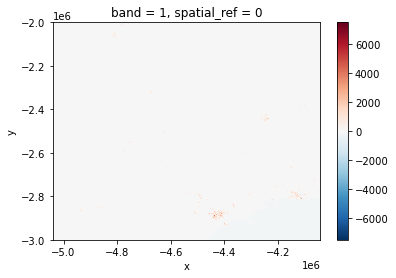

In [46]:
ghsl.sel(band=1).plot()

### Por que meu mapa ficou menos colorido?

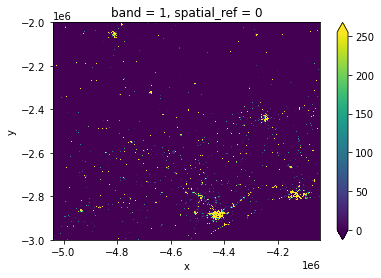

In [47]:
ghsl.sel(band=1).plot(vmin=0, vmax=255)

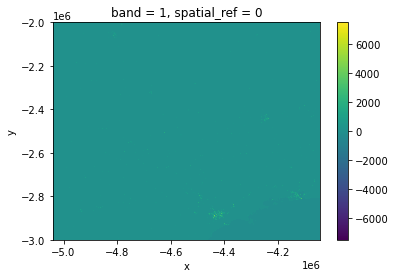

In [48]:
ghsl.sel(band=1).plot(cmap='viridis')

Nesses dois exemplos, o primeiro gráfico, deu para observar melhor. No caso, parece ser mais uma questão de enfatizar mesmo, porque os dados ficam são poucos visiveis pela escala.  

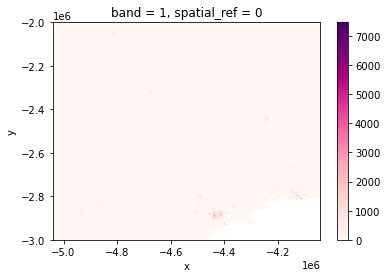

In [49]:
#Retirando os valores considerados inexistentes, Fillvalue/nodatavals.
ghsl.where(ghsl!=-200).sel(band=1).plot(cmap="RdPu")

### Como visto no mapa apresentado, não se enxerga quase nada. 

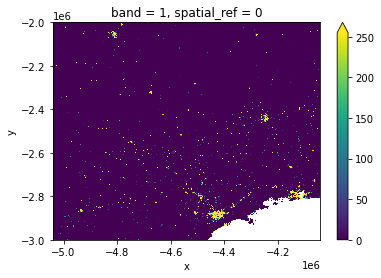

In [53]:
ghsl.where(ghsl!=-200).sel(band=1).plot(vmin=0, vmax=255)

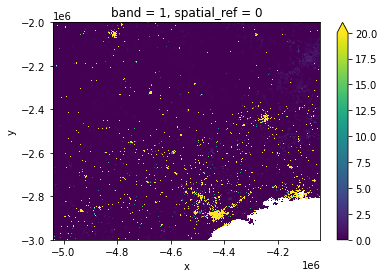

In [56]:
ghsl.where(ghsl!=-200).sel(band=1).plot(vmin=0,vmax=20)

## Para estudar outras estruturas.
**Respresentando em Grafos, usando a biblioteca OSMNX**

In [59]:
#importando a biblioteca.
import osmnx

O uso do OSMNX para conectar com Open Street Map

In [60]:

graph = osmnx.graph_from_place("Yoyogi Park, Shibuya, Tokyo, Japan")


Requer conectividade com a internet para funcionar, pois requer contato com o servidor. 

In [61]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

## Como representar um grafico como gráfos?

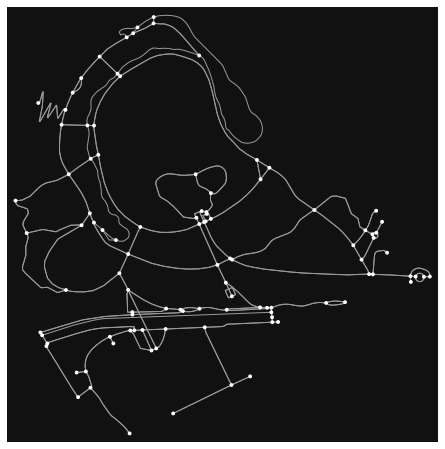

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [62]:
osmnx.plot_graph(graph)

O objeto resultante, no caso o que representa essa imagem é na verdade um MultiDiGraph from networkx. **Uma biblioteca de gráficos escrita em python**.

### Agora é possível fazer um teste, representar a cidade universitária.

In [63]:
graph1 = osmnx.graph_from_place("Cidade Universitária, Rio de Janeiro, Rio de Janeiro, Brasil")

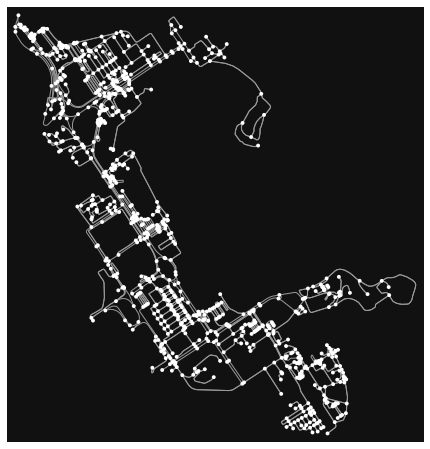

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [64]:
osmnx.plot_graph(graph1)

### É interessante notar.
**Notar que o mapa é construido por caminhos e intersecções. Cada ponto é uma interseção ou um fim de caminho.**

In [65]:
#Contando a quantidade de nós.

len(graph1.nodes)

880

**No caso, são 880 cruzamento de ruas.**

### Qual é o número de caminhos?

In [66]:
len(graph1.edges)

1984

**No caso, são 1984 caminhos dentro da Cidade Universitária**

In [68]:
graph.nodes[1520546819]

{'y': 35.6711267, 'x': 139.6925951, 'street_count': 4}

Cada nó tem um ID específico no grafo.

In [69]:
graph.edges[(1520546819, 3010293622, 0)]

{'osmid': 138670840,
 'highway': 'footway',
 'oneway': False,
 'reversed': False,
 'length': 59.113,
 'geometry': <LINESTRING (139.693 35.671, 139.693 35.671, 139.693 35.671)>}

Essas são as caracteristicas das arestas. 

'osmid': O identificador único da aresta no grafo.
'highway': O tipo de via associado à aresta, neste caso, 'footway' que indica uma passagem exclusiva para pedestres.
'oneway': Indica se a aresta é de sentido único ou não. No exemplo, está definido como False, o que significa que a aresta permite tráfego em ambas as direções.
'reversed': Indica se a geometria da aresta está reversa em relação à direção original. No exemplo, está definido como False, indicando que a geometria está corretamente orientada.
'length': O comprimento da aresta em unidades específicas, como metros.
'geometry': A geometria da aresta, representada por uma linha (LINESTRING) no exemplo. A linha descreve a forma e o caminho da aresta no espaço.

### Se diferentes nós conectam entre si, quais nós se conectam ao nó do ID escolhido?

In [70]:
list(graph.adj[1520546819].keys())

[3010293622, 5764960322, 1913626649, 1520546959]